<a href="https://colab.research.google.com/github/MEDISETTISANJAY196/FMML.LABS/blob/main/FMML_2024_Module_04_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

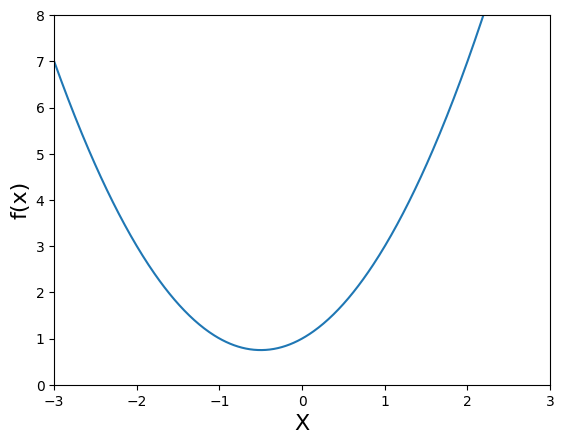

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2 * x + 1

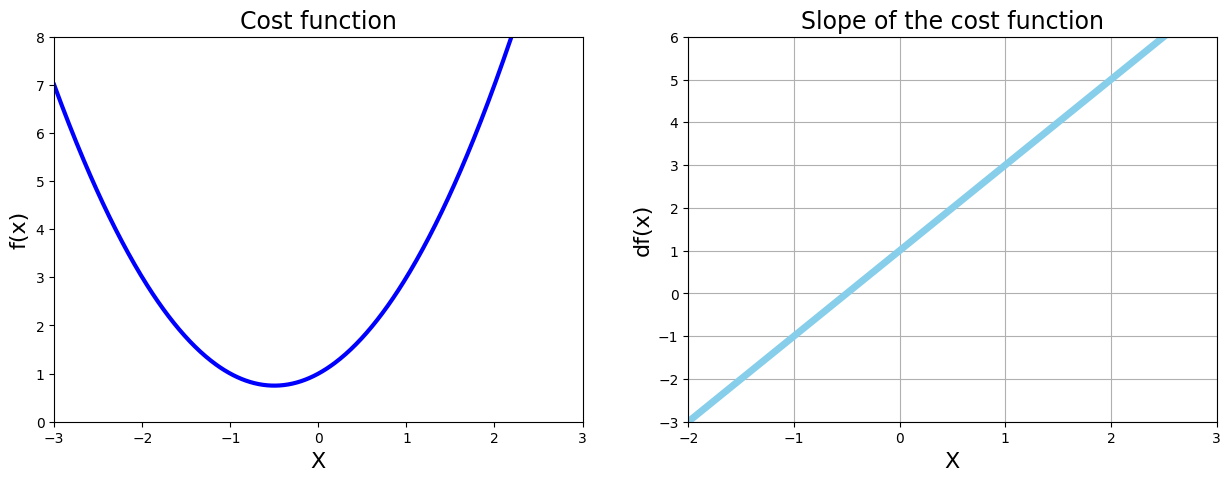

In [6]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [9]:
# Gradient Descent
new_x = 3  # Initial guess
previous_x = 0  # Previous value of x (for convergence check)
step_multiplier = 0.1  # Learning rate (step size)
precision = 0.00001  # Stopping criteria based on small change in x

x_list = [new_x]  # To track the value of x over iterations
slope_list = [df(new_x)]  # To track the slope at each point

for n in range(500):  # Loop for a maximum of 500 iterations
    previous_x = new_x  # Update the previous value of x
    gradient = df(new_x)  # Compute the gradient (derivative) at new_x
    new_x = new_x - step_multiplier * gradient  # Update x based on gradient descent rule

    step_size = abs(new_x - previous_x)  # Measure the change in x

    x_list.append(new_x)  # Append new_x to the list of x values
    slope_list.append(df(new_x))  # Append the slope (derivative) at new_x

    if step_size < precision:  # If the change in x is very small, break the loop
        print('Loop ran this many times:', n)
        break

# Print results
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


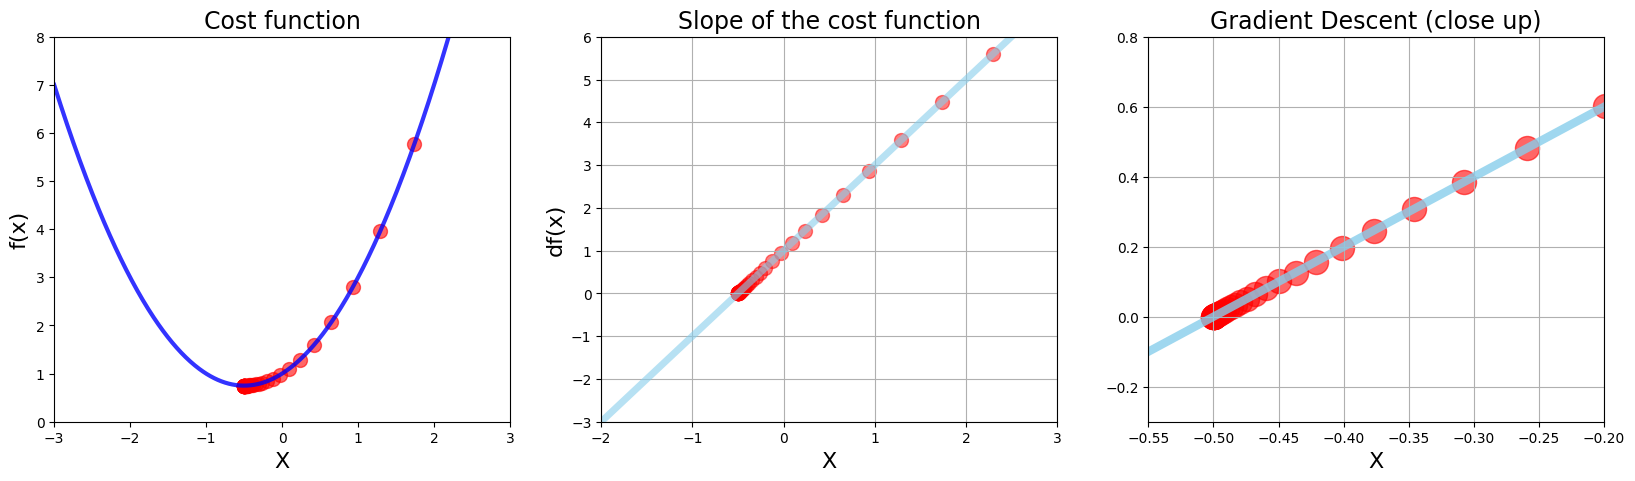

In [10]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return ## [REQUIRED]

def dg(x):
    return ## [REQUIRED]

In [12]:
## TASK-3 : Plot function and derivative side by side like has been done earlier

## Gradient Descent

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [17]:
def gradient_descent(dg, x0, step_size, precision):
    # Initialize variables
    current_x = x0
    list_x = [current_x]  # To store the history of x values
    deriv_list = [dg(current_x)]  # To store the derivatives (slopes) at each point

    # Perform the gradient descent loop
    while True:
        gradient = dg(current_x)  # Compute the gradient (derivative) at current_x
        next_x = current_x - step_size * gradient  # Update x based on gradient descent rule

        # Track the x value and derivative for this iteration
        list_x.append(next_x)
        deriv_list.append(dg(next_x))

        # Check the stopping condition (if the change in x is smaller than precision)
        if abs(next_x - current_x) < precision:
            break

        # Update current_x for the next iteration
        current_x = next_x

    # Return the final results: local minimum, list of x values, and list of derivatives
    return current_x, list_x, deriv_list


In [19]:
def gradient_descent(derivative_func, initial_guess, multiplier, precision):
    # Initialize variables
    current_x = initial_guess
    list_x = [current_x]  # To store the history of x values
    deriv_list = [derivative_func(current_x)]  # To store the derivatives (slopes) at each point

    # Perform the gradient descent loop
    while True:
        gradient = derivative_func(current_x)  # Compute the gradient (derivative) at current_x
        next_x = current_x - multiplier * gradient  # Update x based on gradient descent rule

        # Track the x value and derivative for this iteration
        list_x.append(next_x)
        deriv_list.append(derivative_func(next_x))

        # Check the stopping condition (if the change in x is smaller than precision)
        if abs(next_x - current_x) < precision:
            break

        # Update current_x for the next iteration
        current_x = next_x

    # Return the final results: local minimum, list of x values, and list of derivatives
    return current_x, list_x, deriv_list


In [21]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001):
    # Initialize variables
    current_x = initial_guess
    list_x = [current_x]  # To store the history of x values
    deriv_list = [derivative_func(current_x)]  # To store the derivatives (slopes) at each point

    # Perform the gradient descent loop
    while True:
        gradient = derivative_func(current_x)  # Compute the gradient (derivative) at current_x
        next_x = current_x - multiplier * gradient  # Update x based on gradient descent rule

        # Track the x value and derivative for this iteration
        list_x.append(next_x)
        deriv_list.append(derivative_func(next_x))

        # Check the stopping condition (if the change in x is smaller than precision)
        if abs(next_x - current_x) < precision:
            break

        # Update current_x for the next iteration
        current_x = next_x

    # Return the final results: local minimum, list of x values, and list of derivatives
    return current_x, list_x, deriv_list


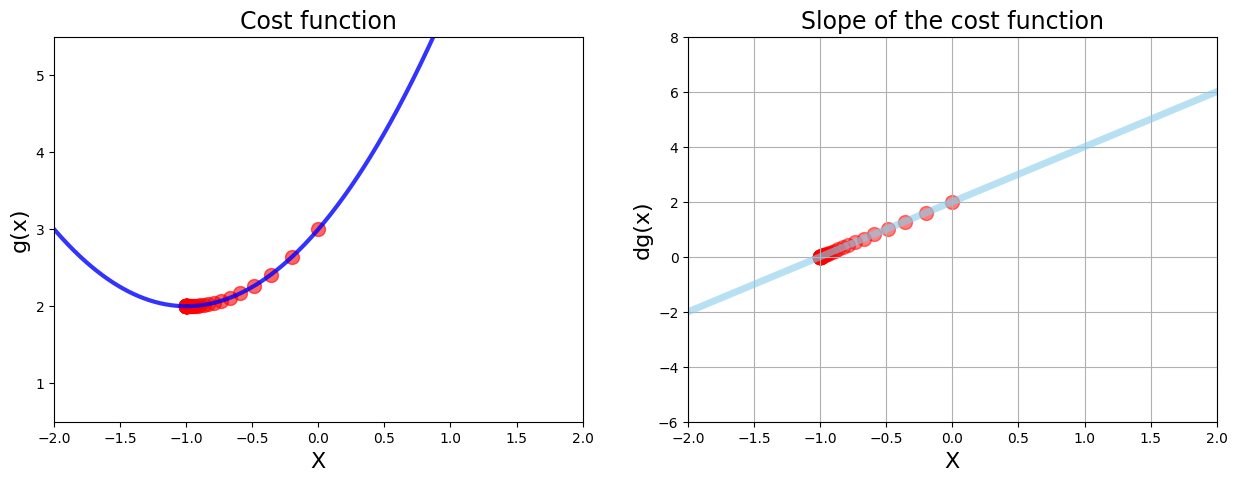

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function and its derivative
def g(x):
    return x**2 + 2*x + 3  # Example cost function

def dg(x):
    return 2*x + 2  # Derivative of the cost function

# Gradient descent function (example)
def gradient_descent(derivative_func, initial_guess, learning_rate=0.1, tolerance=1e-5, max_iters=100):
    x = initial_guess
    list_x = [x]
    deriv_list = [derivative_func(x)]

    for _ in range(max_iters):
        gradient = derivative_func(x)
        if abs(gradient) < tolerance:
            break
        x = x - learning_rate * gradient
        list_x.append(x)
        deriv_list.append(derivative_func(x))

    return x, list_x, deriv_list

# Initial guess and gradient descent run
local_min, list_x, deriv_list = gradient_descent(dg, initial_guess=0)

# Create the x-values for plotting
x_2 = np.linspace(-2, 2, 400)

# Plotting
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()


### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

In [25]:
## TASK-4 : Code the same things as they were done for the first two examples

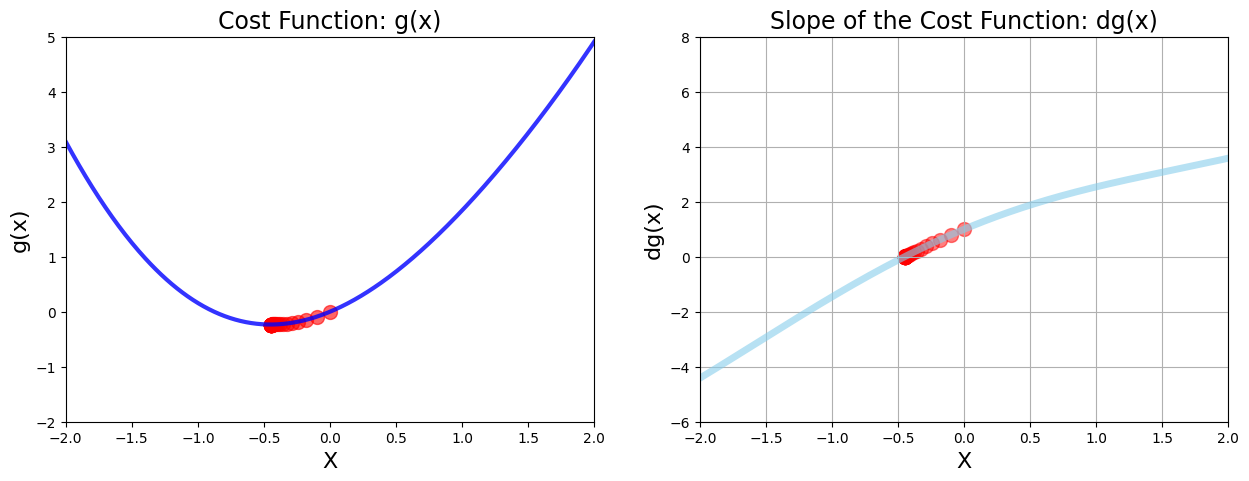

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the new cost function (g(x)) and its derivative (dg(x))
def g(x):
    return np.sin(x) + x**2  # New example cost function

def dg(x):
    return np.cos(x) + 2*x  # Derivative of the new cost function

# Gradient descent function (same as before)
def gradient_descent(derivative_func, initial_guess, learning_rate=0.1, tolerance=1e-5, max_iters=100):
    x = initial_guess
    list_x = [x]  # Track the x values during gradient descent
    deriv_list = [derivative_func(x)]  # Track the derivative values at each step

    for _ in range(max_iters):
        gradient = derivative_func(x)
        if abs(gradient) < tolerance:
            break
        x = x - learning_rate * gradient  # Update x using the gradient
        list_x.append(x)
        deriv_list.append(derivative_func(x))

    return x, list_x, deriv_list

# Run gradient descent with an initial guess
initial_guess = 0
local_min, list_x, deriv_list = gradient_descent(dg, initial_guess)

# Generate x-values for plotting the function and its derivative
x_2 = np.linspace(-2, 2, 400)

# Plotting side by side
plt.figure(figsize=[15, 5])

# 1. Plot the cost function (g(x))
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(-2, 5)
plt.title('Cost Function: g(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)  # Plot the cost function
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)  # Show the gradient descent steps

# 2. Plot the derivative of the cost function (dg(x))
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost Function: dg(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)  # Plot the derivative
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)  # Show the gradient descent steps on the derivative

plt.show()


#### Learning Rate

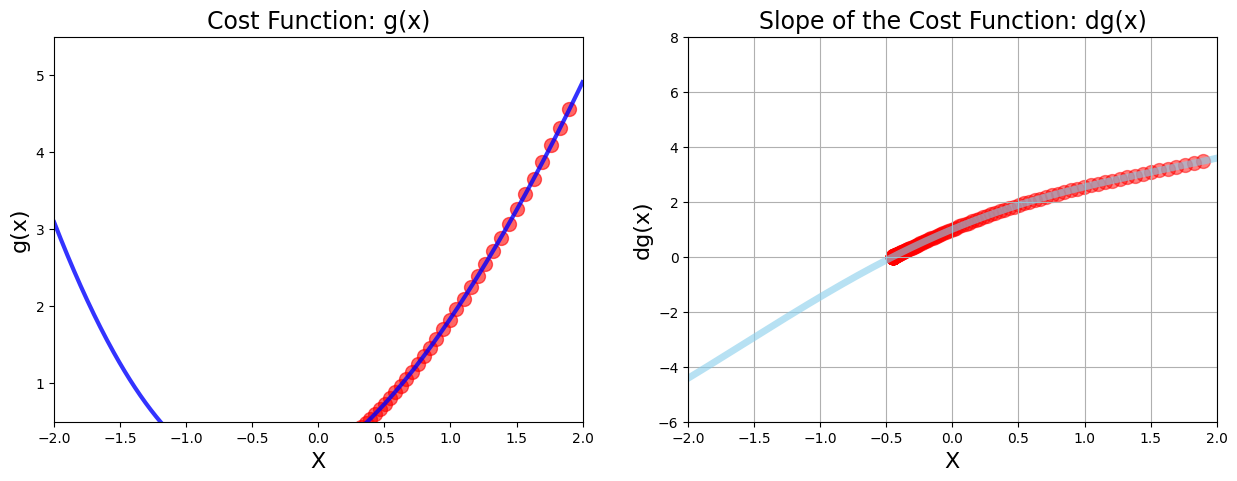

Number of steps is: 279


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Example cost function and its derivative
def g(x):
    return np.sin(x) + x**2  # Cost function

def dg(x):
    return np.cos(x) + 2*x  # Derivative of cost function

# Gradient Descent Implementation
def gradient_descent(derivative_func, initial_guess, multiplier=0.1, max_iter=100, tolerance=1e-5):
    x = initial_guess
    list_x = [x]  # To store x values during iterations
    deriv_list = [derivative_func(x)]  # To store derivative values during iterations

    for _ in range(max_iter):
        gradient = derivative_func(x)  # Compute the gradient (derivative)
        if abs(gradient) < tolerance:  # Stop if the gradient is close to zero
            break
        x = x - multiplier * gradient  # Update x using gradient descent
        list_x.append(x)
        deriv_list.append(derivative_func(x))  # Store the gradient at new x

    return x, list_x, deriv_list

# Call gradient descent
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                 multiplier=0.02, max_iter=500)

# Generate x values for plotting
x_2 = np.linspace(-2, 2, 400)

# Plotting side by side
plt.figure(figsize=[15, 5])

# 1. Plot the cost function g(x)
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost Function: g(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)  # Plot cost function
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)  # Gradient descent points

# 2. Plot the derivative dg(x)
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost Function: dg(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)  # Plot derivative
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)  # Gradient descent steps on derivative

# Show the plots
plt.show()

# Print the number of steps gradient descent took
print('Number of steps is:', len(list_x))


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function (g(x)) and its derivative (dg(x))
def g(x):
    return np.sin(x) + x**2  # Example cost function

def dg(x):
    return np.cos(x) + 2*x  # Derivative of the cost function

# Gradient Descent Implementation
def gradient_descent(derivative_func, initial_guess, multiplier=0.1, precision=1e-5, max_iter=100):
    x = initial_guess
    list_x = [x]  # To store x values during iterations
    deriv_list = [derivative_func(x)]  # To store derivative values during iterations

    for _ in range(max_iter):
        gradient = derivative_func(x)  # Compute the gradient (derivative)
        if abs(gradient) < precision:  # Stop if the gradient is close to zero
            break
        x = x - multiplier * gradient  # Update x using gradient descent
        list_x.append(x)
        deriv_list.append(derivative_func(x))  # Store the gradient at new x

    return x, list_x, deriv_list


In [31]:
## TASK-7 : Plot reduction in cost for each iteration

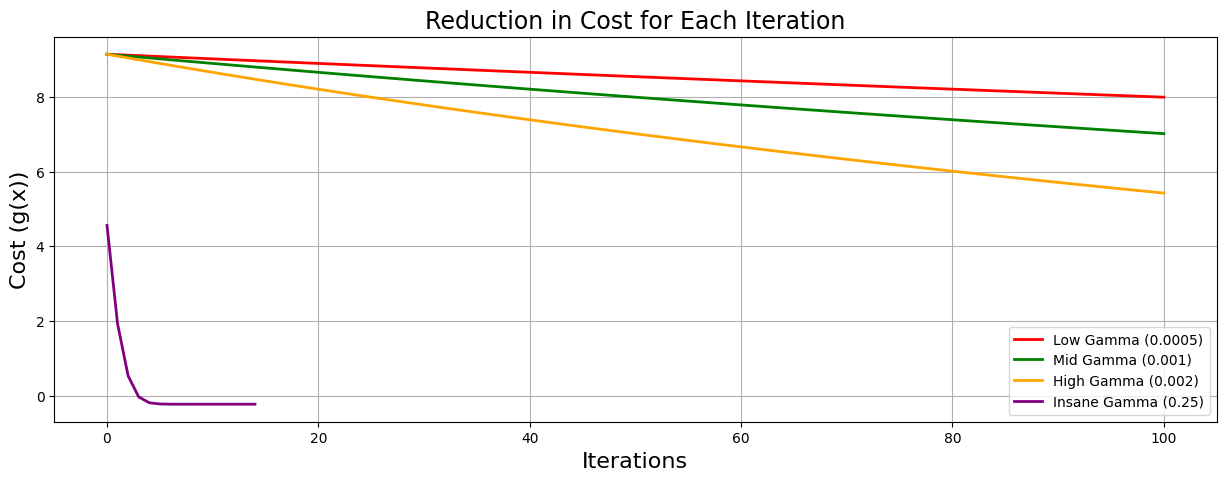

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function (g(x)) and its derivative (dg(x))
def g(x):
    return np.sin(x) + x**2  # Example cost function

def dg(x):
    return np.cos(x) + 2*x  # Derivative of the cost function

# Gradient Descent Implementation
def gradient_descent(derivative_func, initial_guess, multiplier=0.1, precision=1e-5, max_iter=100):
    x = initial_guess
    list_x = [x]  # To store x values during iterations
    cost_list = [g(x)]  # To store cost (g(x)) at each iteration
    deriv_list = [derivative_func(x)]  # To store derivative values during iterations

    for _ in range(max_iter):
        gradient = derivative_func(x)  # Compute the gradient (derivative)
        if abs(gradient) < precision:  # Stop if the gradient is close to zero
            break
        x = x - multiplier * gradient  # Update x using gradient descent
        list_x.append(x)
        cost_list.append(g(x))  # Track the cost at each iteration
        deriv_list.append(derivative_func(x))  # Store the gradient at new x

    return x, list_x, cost_list, deriv_list

# Number of iterations
n = 100

# Low learning rate (low_gamma)
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)

# Mid learning rate (mid_gamma)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)

# High learning rate (high_gamma)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)

# Insane learning rate (insane_gamma)
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting the reduction in cost for each learning rate
plt.figure(figsize=[15, 5])

# Plot cost reduction for low_gamma, mid_gamma, high_gamma, and insane_gamma
plt.plot(low_gamma[2], label="Low Gamma (0.0005)", color='red', linewidth=2)
plt.plot(mid_gamma[2], label="Mid Gamma (0.001)", color='green', linewidth=2)
plt.plot(high_gamma[2], label="High Gamma (0.002)", color='orange', linewidth=2)
plt.plot(insane_gamma[2], label="Insane Gamma (0.25)", color='purple', linewidth=2)

plt.title('Reduction in Cost for Each Iteration', fontsize=17)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Cost (g(x))', fontsize=16)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [32]:
## TASK-8 : Code the same things as they were done for the first two examples

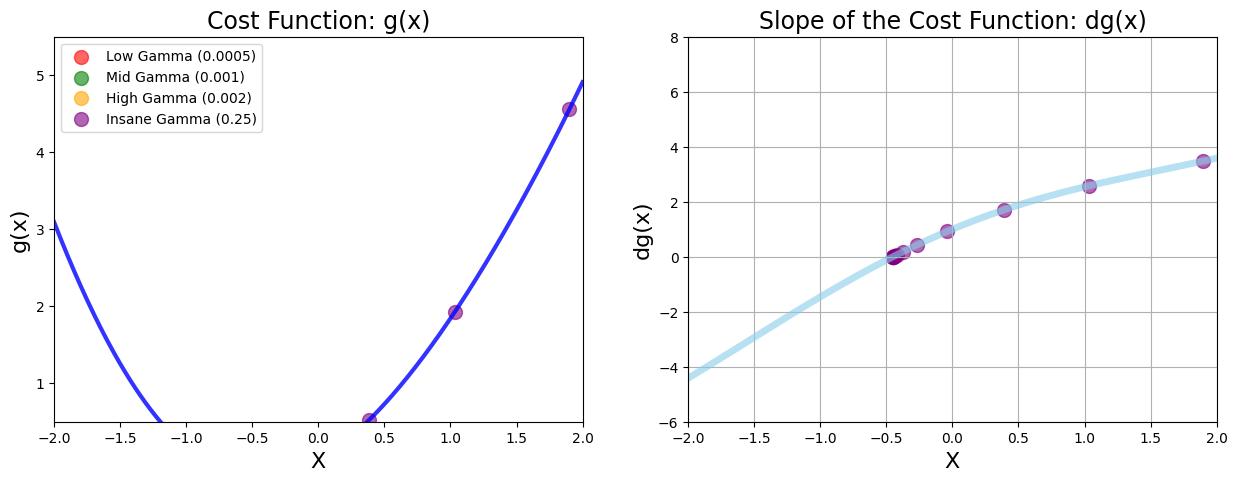

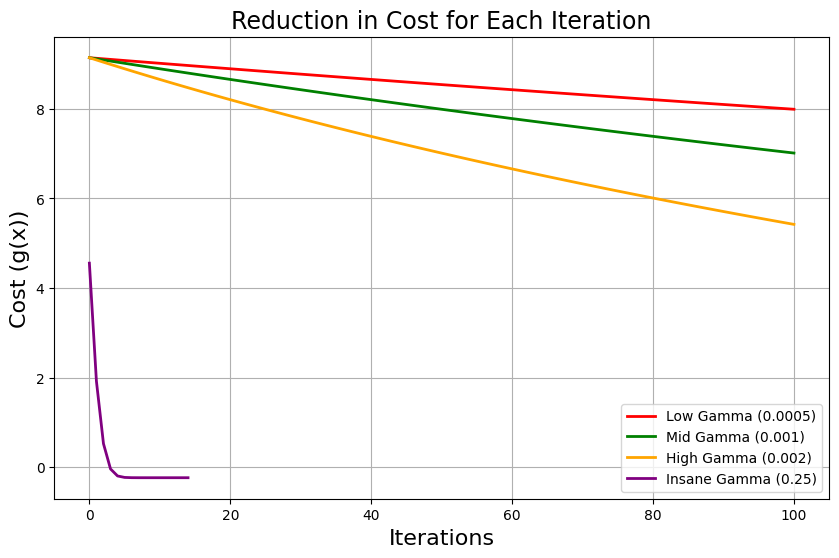

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function (g(x)) and its derivative (dg(x))
def g(x):
    return np.sin(x) + x**2  # Example cost function

def dg(x):
    return np.cos(x) + 2*x  # Derivative of the cost function

# Gradient Descent Implementation
def gradient_descent(derivative_func, initial_guess, multiplier=0.1, precision=1e-5, max_iter=100):
    x = initial_guess
    list_x = [x]  # To store x values during iterations
    cost_list = [g(x)]  # To store cost (g(x)) at each iteration
    deriv_list = [derivative_func(x)]  # To store derivative values during iterations

    for _ in range(max_iter):
        gradient = derivative_func(x)  # Compute the gradient (derivative)
        if abs(gradient) < precision:  # Stop if the gradient is close to zero
            break
        x = x - multiplier * gradient  # Update x using gradient descent
        list_x.append(x)
        cost_list.append(g(x))  # Track the cost at each iteration
        deriv_list.append(derivative_func(x))  # Store the gradient at new x

    return x, list_x, cost_list, deriv_list

# Number of iterations
n = 100

# Run gradient descent for different learning rates (low, mid, high, insane)
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)

insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting the cost function and its derivative for all learning rates

# Generate x-values for plotting the function and its derivative
x_2 = np.linspace(-2, 2, 400)

plt.figure(figsize=[15, 5])

# 1. Plot the cost function g(x)
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost Function: g(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)  # Plot cost function

# Plot gradient descent paths for different learning rates
plt.scatter(low_gamma[1], g(np.array(low_gamma[1])), color='red', s=100, alpha=0.6, label='Low Gamma (0.0005)')
plt.scatter(mid_gamma[1], g(np.array(mid_gamma[1])), color='green', s=100, alpha=0.6, label='Mid Gamma (0.001)')
plt.scatter(high_gamma[1], g(np.array(high_gamma[1])), color='orange', s=100, alpha=0.6, label='High Gamma (0.002)')
plt.scatter(insane_gamma[1], g(np.array(insane_gamma[1])), color='purple', s=100, alpha=0.6, label='Insane Gamma (0.25)')

plt.legend()

# 2. Plot the derivative dg(x)
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost Function: dg(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)  # Plot derivative

# Plot the gradient descent steps on the derivative plot
plt.scatter(low_gamma[1], low_gamma[3], color='red', s=100, alpha=0.6)
plt.scatter(mid_gamma[1], mid_gamma[3], color='green', s=100, alpha=0.6)
plt.scatter(high_gamma[1], high_gamma[3], color='orange', s=100, alpha=0.6)
plt.scatter(insane_gamma[1], insane_gamma[3], color='purple', s=100, alpha=0.6)

# Show the plots
plt.show()

# Plot the reduction in cost for each iteration

plt.figure(figsize=[10, 6])

# Plot cost reduction for low_gamma, mid_gamma, high_gamma, and insane_gamma
plt.plot(low_gamma[2], label="Low Gamma (0.0005)", color='red', linewidth=2)
plt.plot(mid_gamma[2], label="Mid Gamma (0.001)", color='green', linewidth=2)
plt.plot(high_gamma[2], label="High Gamma (0.002)", color='orange', linewidth=2)
plt.plot(insane_gamma[2], label="Insane Gamma (0.25)", color='purple', linewidth=2)

plt.title('Reduction in Cost for Each Iteration', fontsize=17)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Cost (g(x))', fontsize=16)
plt.legend()
plt.grid(True)

# Show the cost reduction plot
plt.show()


In [34]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


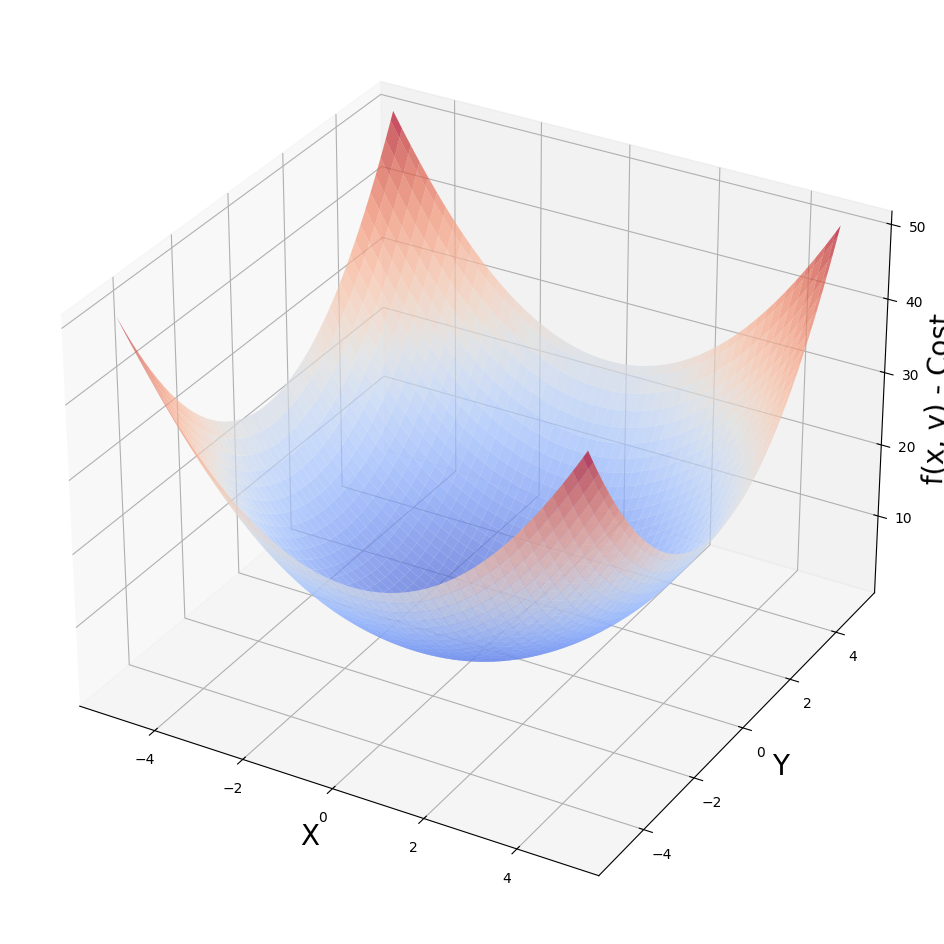

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Step 1: Define the cost function f(x, y)
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) + x**2 + y**2  # Example cost function

# Step 2: Generate mesh grids for x and y
x_4 = np.linspace(-5, 5, 100)  # x-values from -5 to 5
y_4 = np.linspace(-5, 5, 100)  # y-values from -5 to 5

x_4, y_4 = np.meshgrid(x_4, y_4)  # Create mesh grid for x and y

# Step 3: Evaluate the cost function on the mesh grid
z_4 = f(x_4, y_4)  # f(x, y) gives the cost at each (x, y) point

# Step 4: Create the 3D surface plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')


# Set labels
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot the surface
ax.plot_surface(x_4, y_4, z_4, cmap=cm.coolwarm, alpha=0.7)

# Show the plot
plt.show()


### TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = ## [REQUIRED]

#### $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [44]:
from sympy import symbols, diff, sin, sqrt, lambdify

# Step 1: Define the symbolic variables
x, y = symbols('x y')

# Step 2: Define the cost function f(x, y)
def f(x, y):
    return sin(sqrt(x**2 + y**2)) + x**2 + y**2  # Example cost function using sympy

# Step 3: Print the cost function
print('Our cost function f(x, y) is: ', f(x, y))

# Step 4: Compute and print partial derivative with respect to y
print('Partial derivative wrt y is: ', diff(f(x, y), y))

# Step 5: Compute and print the value of the cost function at x=1.8, y=1.0
f_lambda = lambdify((x, y), f(x, y), 'numpy')  # Convert symbolic f(x, y) to a function
print('Value of f(x,y) at x=1.8, y=1.0 is: ', f_lambda(1.8, 1.0))

# Step 6: Compute and print the value of the partial derivative with respect to x at x=1.8, y=1.0
partial_x_lambda = lambdify((x, y), diff(f(x, y), x), 'numpy')  # Convert the derivative to a function
print('Value of partial derivative wrt x at x=1.8, y=1.0 is: ', partial_x_lambda(1.8, 1.0))


Our cost function f(x, y) is:  x**2 + y**2 + sin(sqrt(x**2 + y**2))
Partial derivative wrt y is:  2*y + y*cos(sqrt(x**2 + y**2))/sqrt(x**2 + y**2)
Value of f(x,y) at x=1.8, y=1.0 is:  5.123117713196773
Value of partial derivative wrt x at x=1.8, y=1.0 is:  3.1898878262552497


#### Batch Gradient Descent with SymPy

*   List item
*   List item



In [45]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-0.969791954814749 -0.538773308230414]
Minimum occurs at x value of:  0.0484895977407375
Minimum occurs at y value of:  0.0269386654115207
The cost is:  0.0585185979745116


In [46]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return ## [REQUIRED]

def fpy(x, y):
    return ## [REQUIRED]

In [48]:
import numpy as np
from sympy import symbols, diff, sin, sqrt

# Step 1: Define symbolic variables
x, y = symbols('x y')

# Step 2: Define the cost function f(x, y)
def f(x, y):
    return sin(sqrt(x**2 + y**2)) + x**2 + y**2  # Example cost function

# Step 3: Define the partial derivatives (gradients)
def fpx(x, y):
    return diff(f(x, y), x)  # Partial derivative of f with respect to x

def fpy(x, y):
    return diff(f(x, y), y)  # Partial derivative of f with respect to y

# Step 4: Create lambda functions for the gradients (numerical evaluation)
from sympy import lambdify
fpx_lambda = lambdify((x, y), fpx(x, y), 'numpy')  # Gradient wrt x
fpy_lambda = lambdify((x, y), fpy(x, y), 'numpy')  # Gradient wrt y

# Step 5: Setup gradient descent parameters
multiplier = 0.1  # Learning rate (step size)
max_iter = 500    # Max number of iterations
params = np.array([1.8, 1.0])  # Initial guess for (x, y)

# Step 6: Perform gradient descent
for n in range(max_iter):
    # Compute the gradients at the current parameter values
    gradient_x = fpx_lambda(params[0], params[1])  # Gradient of f with respect to x
    gradient_y = fpy_lambda(params[0], params[1])  # Gradient of f with respect to y

    # Combine gradients into a vector
    gradients = np.array([gradient_x, gradient_y])

    # Update the parameters using gradient descent update rule
    params = params - multiplier * gradients

    # Optional: Print parameters every 100 iterations to monitor progress
    if n % 100 == 0:
        print(f"Iteration {n}, x: {params[0]}, y: {params[1]}, cost: {f(params[0], params[1])}")

# Step 7: Output the final results
print('Gradient array at the end: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Iteration 0, x: 1.481011217374475, y: 0.8227840096524861, cost: 3.86276121123518
Iteration 100, x: -0.04848959771470611, y: -0.026938665397058956, cost: 0.0585185979414750
Iteration 200, x: -0.04848959774073745, y: -0.026938665411520728, cost: 0.0585185979745116
Iteration 300, x: -0.04848959774073745, y: -0.026938665411520728, cost: 0.0585185979745116
Iteration 400, x: -0.04848959774073745, y: -0.026938665411520728, cost: 0.0585185979745116
Gradient array at the end:  [-0.96979195 -0.53877331]
Minimum occurs at x value of:  0.04848959774073748
Minimum occurs at y value of:  0.02693866541152074
The cost is:  0.0585185979745116




```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

Values in gradient array: [-0.96979195 -0.53877331]
Minimum occurs at x value of:  0.04848959774073748
Minimum occurs at y value of:  0.02693866541152074
The cost is:  0.0585185979745116


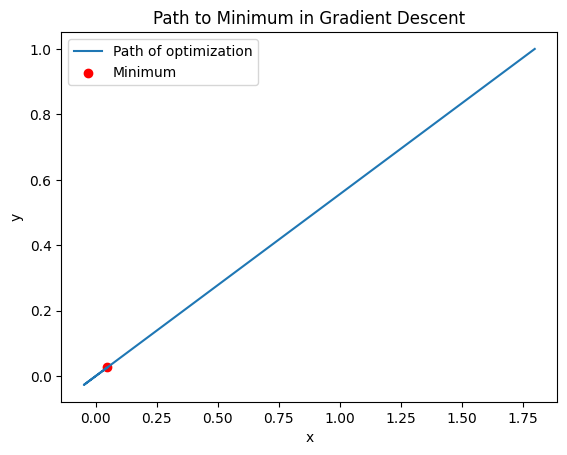

In [50]:
import numpy as np
from sympy import symbols, diff, sin, sqrt, lambdify

# Step 1: Define symbolic variables
x, y = symbols('x y')

# Step 2: Define the cost function f(x, y)
def f(x, y):
    return sin(sqrt(x**2 + y**2)) + x**2 + y**2  # Example cost function

# Step 3: Define the partial derivatives (gradients)
def fpx(x, y):
    return diff(f(x, y), x)  # Partial derivative of f with respect to x

def fpy(x, y):
    return diff(f(x, y), y)  # Partial derivative of f with respect to y

# Step 4: Create lambda functions for the gradients (numerical evaluation)
from sympy import lambdify
fpx_lambda = lambdify((x, y), fpx(x, y), 'numpy')  # Gradient wrt x
fpy_lambda = lambdify((x, y), fpy(x, y), 'numpy')  # Gradient wrt y

# Step 5: Setup gradient descent parameters
multiplier = 0.1  # Learning rate (step size)
max_iter = 200    # Max number of iterations
params = np.array([1.8, 1.0])  # Initial guess for (x, y)

# Initialize the array to store the parameter values at each iteration
values_array = params.reshape(1, 2)

# Step 6: Perform gradient descent
for n in range(max_iter):
    # Compute the gradients at the current parameter values
    gradient_x = fpx_lambda(params[0], params[1])  # Gradient of f with respect to x
    gradient_y = fpy_lambda(params[0], params[1])  # Gradient of f with respect to y

    # Combine gradients into a vector
    gradients = np.array([gradient_x, gradient_y])

    # Update the parameters using gradient descent update rule
    params = params - multiplier * gradients

    # Append the updated parameter values to the values_array
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)

# Step 7: Output the final results
print('Values in gradient array:', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

# Optionally, plot the values of x and y over the iterations
plt.plot(values_array[:, 0], values_array[:, 1], label='Path of optimization')
plt.scatter(params[0], params[1], color='red', label='Minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Path to Minimum in Gradient Descent')
plt.legend()
plt.show()


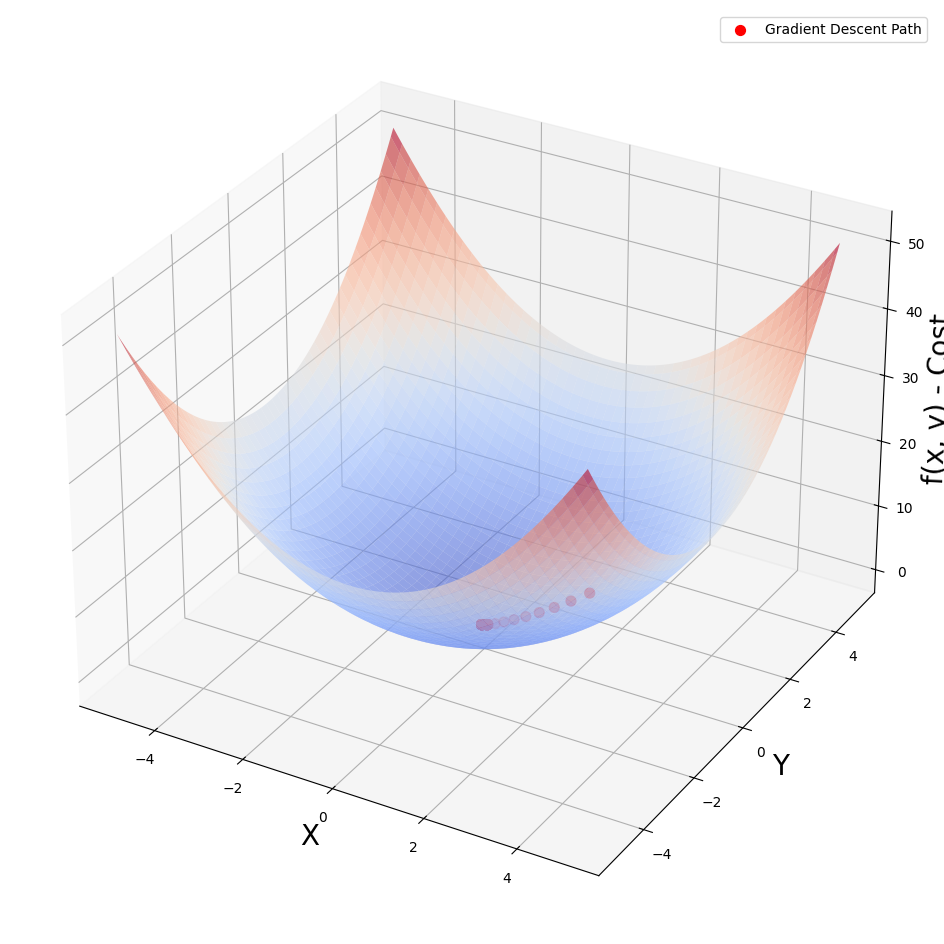

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sympy import symbols, sin, sqrt, lambdify

# Step 1: Define symbolic variables
x, y = symbols('x y')

# Step 2: Define the cost function f(x, y)
f_sympy = sin(sqrt(x**2 + y**2)) + x**2 + y**2  # Example cost function using sympy

# Step 3: Create lambdified version of the function
f_lambda = lambdify((x, y), f_sympy, 'numpy')  # Convert symbolic f(x, y) to a numpy-compatible function

# Step 4: Generate mesh grids for x and y values
x_4 = np.linspace(-5, 5, 100)  # x-values from -5 to 5
y_4 = np.linspace(-5, 5, 100)  # y-values from -5 to 5

x_4, y_4 = np.meshgrid(x_4, y_4)  # Create mesh grid for x and y

# Step 5: Evaluate the cost function on the mesh grid
z_4 = f_lambda(x_4, y_4)  # f(x, y) gives the cost at each (x, y) point

# Step 6: Setup for gradient descent
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  # Initial guess for (x, y)
values_array = params.reshape(1, 2)  # Initialize array to track (x, y) values

# Gradient of f(x, y) with respect to x and y
def fpx(x, y):
    return 2*x + (x * np.cos(np.sqrt(x**2 + y**2))) / np.sqrt(x**2 + y**2)

def fpy(x, y):
    return 2*y + (y * np.cos(np.sqrt(x**2 + y**2))) / np.sqrt(x**2 + y**2)

# Step 7: Perform gradient descent
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)

# Step 8: Create the 3D surface plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')



# Set labels
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot the surface
ax.plot_surface(x_4, y_4, z_4, cmap=cm.coolwarm, alpha=0.6)

# Plot the gradient descent path
ax.scatter(values_array[:, 0], values_array[:, 1],
           f_lambda(values_array[:, 0], values_array[:, 1]), s=50, color='red', label='Gradient Descent Path')

# Show the plot
plt.legend()
plt.show()


#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [60]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [61]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


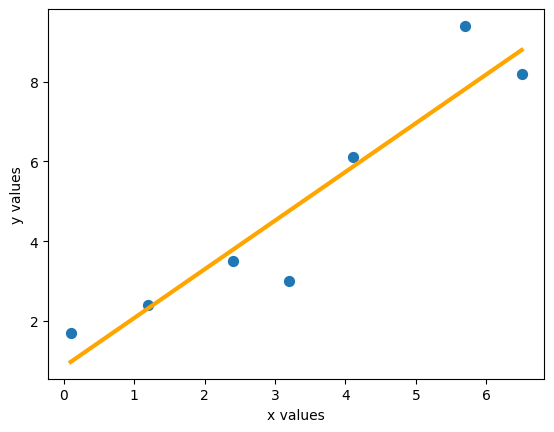

In [62]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [63]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [64]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [65]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [66]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


#### Calc MSE using nested for loops

In [67]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

<ipython-input-67-050b7bf9b7b1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


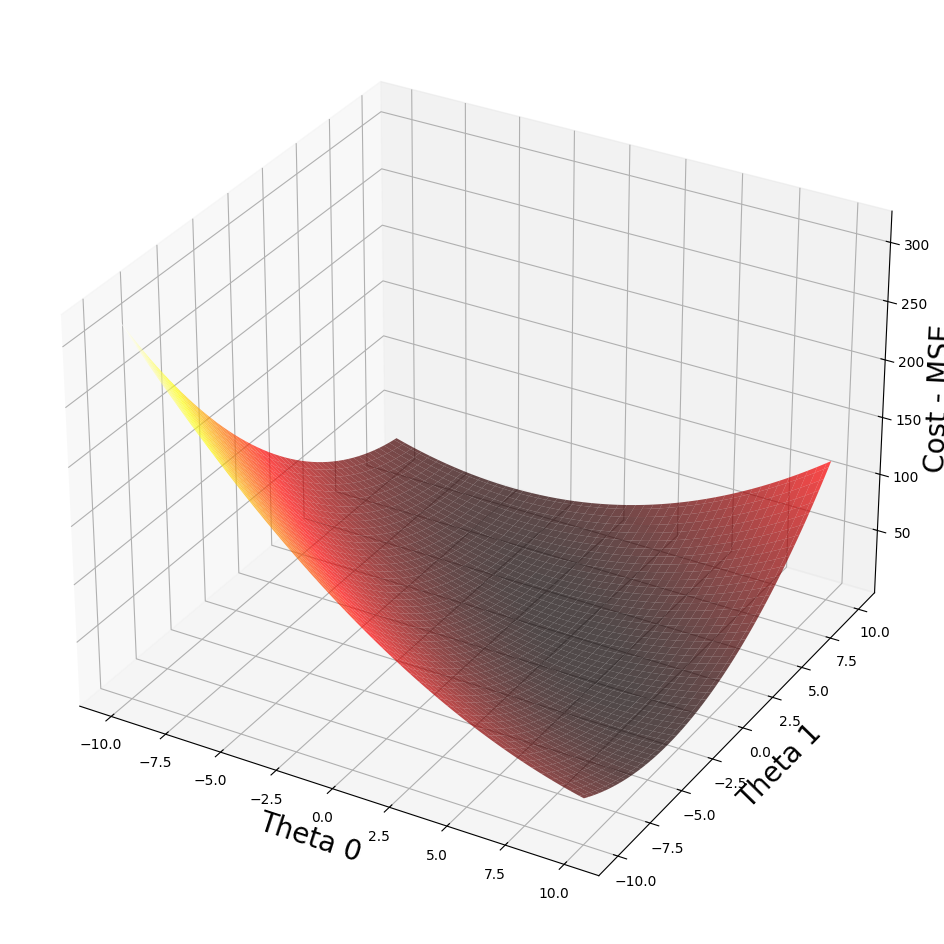

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Step 1: Define the MSE cost function
def compute_mse(theta_0, theta_1, X, y):
    """
    Compute the Mean Squared Error (MSE) for a given theta_0 and theta_1.
    X: Input feature (vector), y: target values
    """
    m = len(y)  # number of training examples
    predictions = theta_0 + theta_1 * X  # Linear model prediction
    mse = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return mse

# Step 2: Generate some synthetic data for demonstration
# For example, assume a simple linear relationship y = 2x + 3 + noise
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 random values for X
y = 3 + 2 * X + np.random.randn(100, 1)  # Corresponding y values with some noise

# Step 3: Create mesh grids for theta_0 and theta_1
theta_0_vals = np.linspace(-10, 10, 100)  # Range of theta_0 values
theta_1_vals = np.linspace(-10, 10, 100)  # Range of theta_1 values
plot_t0, plot_t1 = np.meshgrid(theta_0_vals, theta_1_vals)  # Create mesh grid for theta_0 and theta_1

# Step 4: Compute the cost for each combination of theta_0 and theta_1
plot_cost = np.zeros_like(plot_t0)  # Initialize the cost array with zeros

for i in range(plot_t0.shape[0]):
    for j in range(plot_t0.shape[1]):
        plot_cost[i, j] = compute_mse(plot_t0[i, j], plot_t1[i, j], X, y)  # Compute MSE for each pair

# Step 5: Plot the MSE surface
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

# Set labels
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Plot the surface of the cost function
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot, alpha=0.7)

# Show the plot
plt.show()


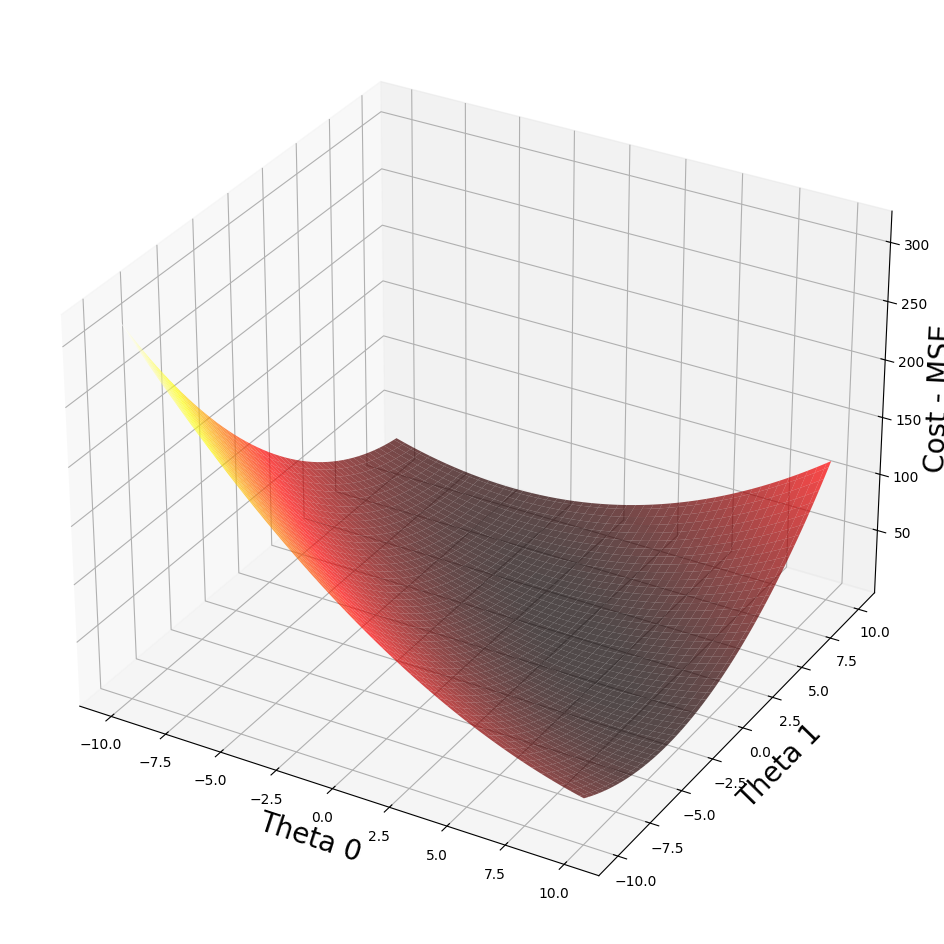

Min value of plot_cost: 0.40612631754787465
Min occurs at (i,j): (58, 66)
Min MSE for Theta 0 at plot_t0[58][66]: 3.333333333333334
Min MSE for Theta 1 at plot_t1[58][66]: 1.7171717171717162


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Step 1: Define the MSE cost function
def compute_mse(theta_0, theta_1, X, y):
    """
    Compute the Mean Squared Error (MSE) for a given theta_0 and theta_1.
    X: Input feature (vector), y: target values
    """
    m = len(y)  # number of training examples
    predictions = theta_0 + theta_1 * X  # Linear model prediction
    mse = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return mse

# Step 2: Generate some synthetic data for demonstration
# For example, assume a simple linear relationship y = 2x + 3 + noise
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 random values for X
y = 3 + 2 * X + np.random.randn(100, 1)  # Corresponding y values with some noise

# Step 3: Create mesh grids for theta_0 and theta_1
theta_0_vals = np.linspace(-10, 10, 100)  # Range of theta_0 values
theta_1_vals = np.linspace(-10, 10, 100)  # Range of theta_1 values
plot_t0, plot_t1 = np.meshgrid(theta_0_vals, theta_1_vals)  # Create mesh grid for theta_0 and theta_1

# Step 4: Compute the cost for each combination of theta_0 and theta_1
plot_cost = np.zeros_like(plot_t0)  # Initialize the cost array with zeros

for i in range(plot_t0.shape[0]):
    for j in range(plot_t0.shape[1]):
        plot_cost[i, j] = compute_mse(plot_t0[i, j], plot_t1[i, j], X, y)  # Compute MSE for each pair

# Step 5: Plot the MSE surface
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

# Set labels
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Plot the surface of the cost function
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot, alpha=0.7)

# Show the plot
plt.show()

# Print the minimum value of plot_cost
print('Min value of plot_cost:', plot_cost.min())

# Find the indices of the minimum value in plot_cost
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)

# Print the corresponding theta_0 and theta_1 values at the minimum cost
min_theta_0 = plot_t0[ij_min]
min_theta_1 = plot_t1[ij_min]
print('Min MSE for Theta 0 at plot_t0[{}][{}]:'.format(ij_min[0], ij_min[1]), min_theta_0)
print('Min MSE for Theta 1 at plot_t1[{}][{}]:'.format(ij_min[0], ij_min[1]), min_theta_1)


#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [72]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [73]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


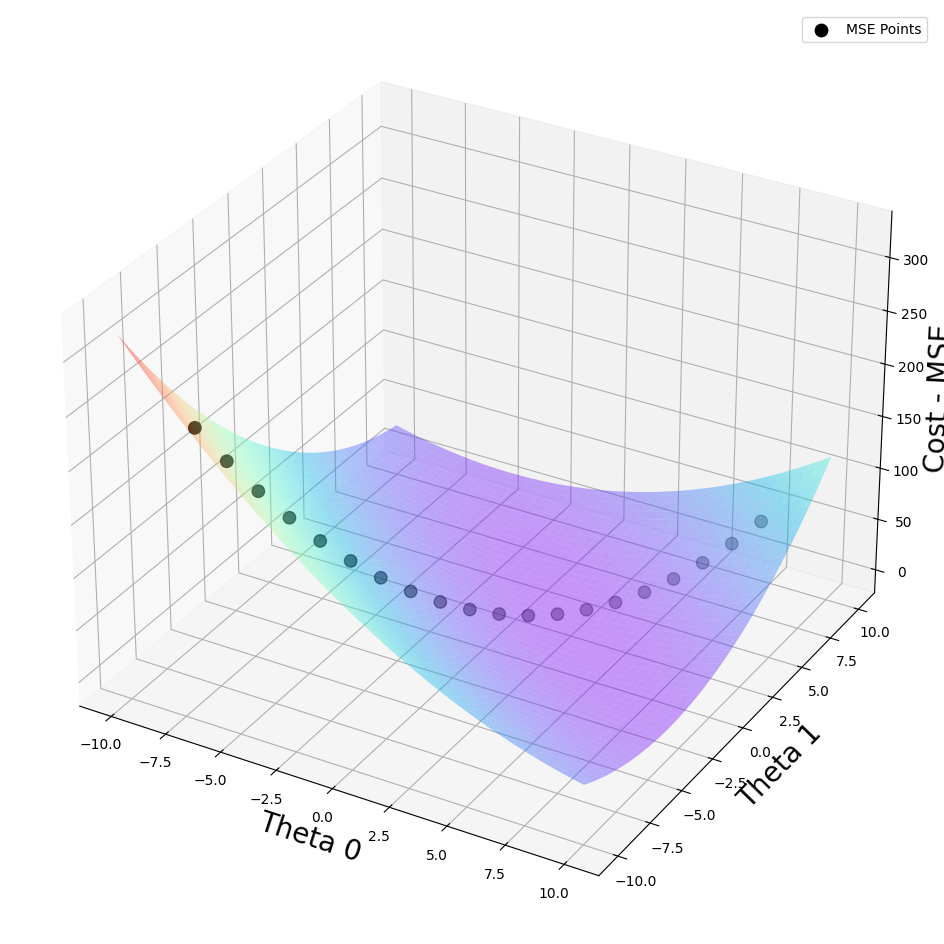

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Step 1: Define the MSE cost function
def compute_mse(theta_0, theta_1, X, y):
    """
    Compute the Mean Squared Error (MSE) for a given theta_0 and theta_1.
    X: Input feature (vector), y: target values
    """
    m = len(y)  # number of training examples
    predictions = theta_0 + theta_1 * X  # Linear model prediction
    mse = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return mse

# Step 2: Generate some synthetic data for demonstration
# For example, assume a simple linear relationship y = 2x + 3 + noise
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 random values for X
y = 3 + 2 * X + np.random.randn(100, 1)  # Corresponding y values with some noise

# Step 3: Create mesh grids for theta_0 and theta_1
theta_0_vals = np.linspace(-10, 10, 100)  # Range of theta_0 values
theta_1_vals = np.linspace(-10, 10, 100)  # Range of theta_1 values
plot_t0, plot_t1 = np.meshgrid(theta_0_vals, theta_1_vals)  # Create mesh grid for theta_0 and theta_1

# Step 4: Compute the cost for each combination of theta_0 and theta_1
plot_cost = np.zeros_like(plot_t0)  # Initialize the cost array with zeros

for i in range(plot_t0.shape[0]):
    for j in range(plot_t0.shape[1]):
        plot_cost[i, j] = compute_mse(plot_t0[i, j], plot_t1[i, j], X, y)  # Compute MSE for each pair

# Step 5: Plotting MSE (scatter + surface)
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

# Step 6: Generate some example theta_0, theta_1 values for scatter plot (e.g., a random path in the grid)
# Let's say these are the "visited" values during gradient descent or any optimization process
theta_0_path = np.linspace(-8, 8, 20)
theta_1_path = np.linspace(-8, 8, 20)
mse_vals = np.array([compute_mse(t0, t1, X, y) for t0, t1 in zip(theta_0_path, theta_1_path)])

# Scatter plot of MSE values at specific (theta_0, theta_1) points
ax.scatter(theta_0_path, theta_1_path, mse_vals, s=80, color='black', label="MSE Points")

# Step 7: Plot the surface of the cost function (MSE)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)

# Step 8: Set labels
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Step 9: Show the plot
plt.legend()
plt.show()
